In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dfs_15 = np.array([pd.read_csv(f'../plots/ablations/runs_ablations_15_{i}.csv').Value.to_numpy() for i in range(1,6)])
dfs_1 = np.array([pd.read_csv(f'../plots/ablations/runs_ablations_1_{i}.csv').Value.to_numpy() for i in range(1,6)])

In [3]:
X = np.linspace(0,3000,1000)
dfs_15_mean = dfs_15.mean(axis=0)
dfs_15_std = dfs_15.std(axis=0)

dfs_1_mean = dfs_1.mean(axis=0)
dfs_1_std = dfs_1.std(axis=0)

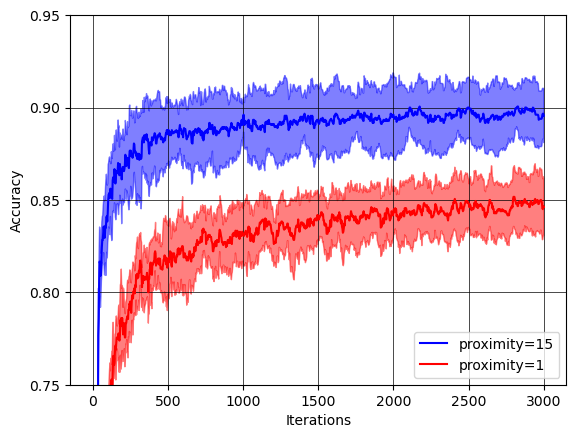

In [4]:
y_ticks = np.arange(0, 1.1, 0.05)
plt.yticks(y_ticks)

plt.plot(X, dfs_15_mean, "b", label="proximity=15")
plt.fill_between(X, dfs_15_mean - dfs_15_std, dfs_15_mean + dfs_15_std, color="blue", alpha=0.5)

plt.plot(X, dfs_1_mean, "r", label="proximity=1")
plt.fill_between(X, dfs_1_mean - dfs_1_std, dfs_1_mean + dfs_1_std, color="red", alpha=0.5)

plt.ylim(0.75,0.95)

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend(loc="lower right")

## Linear Eval Full Data

In [5]:
df_tempo = pd.read_csv('../plots/runs_proper_tp_None.csv')
df_bl = pd.read_csv('../plots/runs_proper_bl_None.csv')

In [6]:
X = df_tempo['Step']
Y_tempo = df_tempo['Value']
Y_bl = df_bl['Value']

In [7]:
X.shape

(1000,)

In [8]:
np.arange(0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

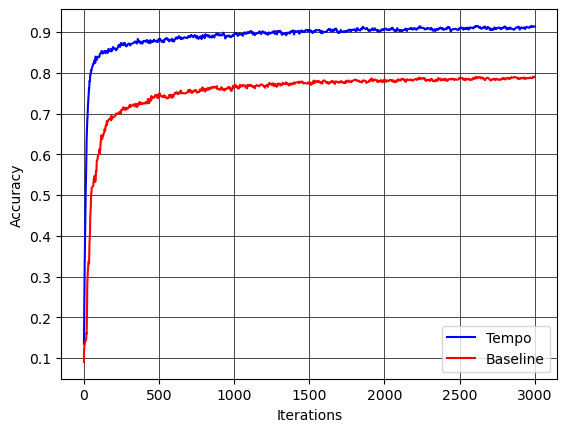

In [9]:
y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)

plt.plot(X, Y_tempo, 'b', label='Tempo')
plt.plot(X, Y_bl, 'r', label='Baseline')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

In [10]:
f"max. Baseline: {Y_bl.max()}, max. Tempo: {Y_tempo.max()}"

'max. Baseline: 0.7902777791023254, max. Tempo: 0.915000021457672'

In [13]:
Y_tempo.max() - Y_bl.max()

0.12472224235534657

## Linear Eval Few-Shot

In [11]:
dfs_bl = [pd.read_csv(f'../plots/linear_eval/baseline/linear_eval_baseline_{str(spc)}.csv').Value.to_numpy().max() for spc in [1,5,10,15,20]]
dfs_tp = [pd.read_csv(f'../plots/linear_eval/tempo/linear_eval_tempo_{str(spc)}.csv').Value.to_numpy().max() for spc in [1,5,10,15,20]]

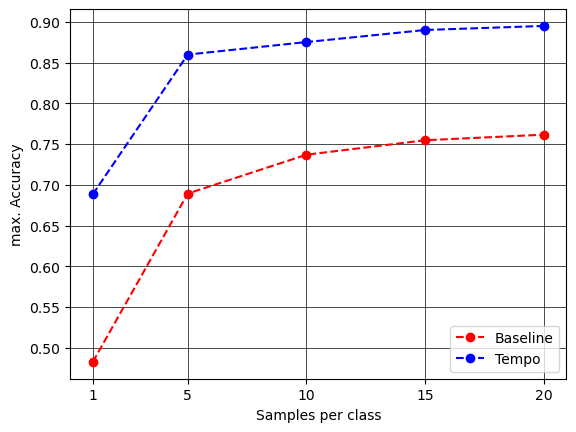

In [12]:
X = [1,5,10,15,20]
plt.xticks(X)
plt.yticks(np.arange(0.4, 1.0, 0.05))
plt.plot(X, dfs_bl, '--ro', label='Baseline')
plt.plot(X, dfs_tp, '--bo', label='Tempo')

plt.xlabel('Samples per class')
plt.ylabel('max. Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

In [18]:
dfs_bl, dfs_tp, np.array(dfs_tp) - np.array(dfs_bl)

([0.4824999868869781,
  0.6892499923706055,
  0.7369999885559082,
  0.7547500133514404,
  0.7615833282470703],
 [0.6884999871253967,
  0.8600000143051147,
  0.875333309173584,
  0.8901666402816772,
  0.8951666951179504],
 array([0.206     , 0.17075002, 0.13833332, 0.13541663, 0.13358337]))

## Semi-Supervised Full

In [20]:
df_tempo = pd.read_csv('../plots/semi_sup_eval2/tempo/semi_sup_eval_tempo_2_None.csv')
df_bl = pd.read_csv('../plots/semi_sup_eval2/baseline/semi_sup_eval_baseline_2_None.csv')

X = df_tempo['Step']
Y_tempo = df_tempo['Value']
Y_bl = df_bl['Value']

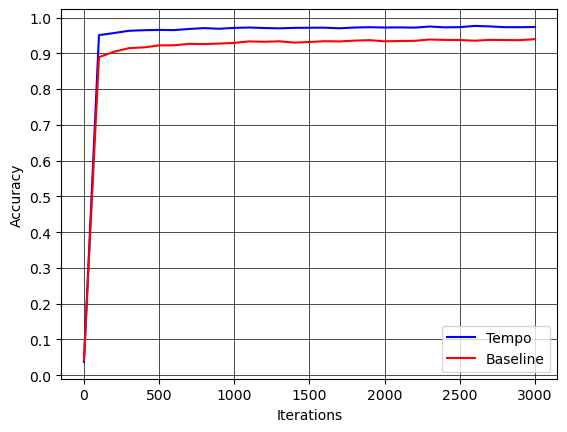

In [21]:
y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)

plt.plot(X, Y_tempo, 'b', label='Tempo')
plt.plot(X, Y_bl, 'r', label='Baseline')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

In [22]:
f"max. Baseline: {Y_bl.max()}, max. Tempo: {Y_tempo.max()}"

'max. Baseline: 0.9395833611488342, max. Tempo: 0.9765833616256714'

In [23]:
Y_tempo.max() - Y_bl.max()

0.03700000047683716

'max. Baseline: 0.9144444465637208, max. Tempo: 0.9683333039283752'

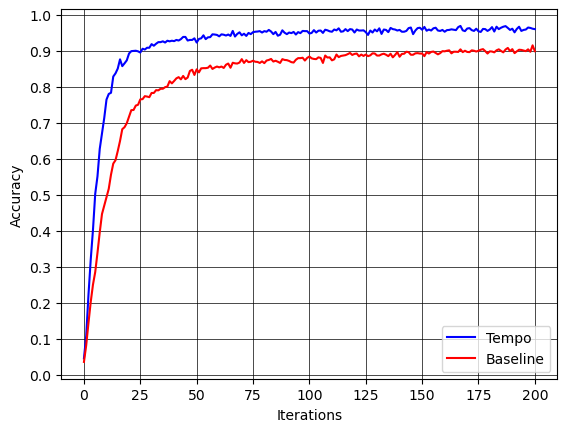

In [16]:
df_tempo = pd.read_csv('../plots/sse_1_None.csv')
df_bl = pd.read_csv('../plots/sse_bl_None.csv')

X = df_tempo['Step']
Y_tempo = df_tempo['Value']
Y_bl = df_bl['Value']

y_ticks = np.arange(0, 1.1, 0.1)
plt.yticks(y_ticks)

plt.plot(X, Y_tempo, 'b', label='Tempo')
plt.plot(X, Y_bl, 'r', label='Baseline')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

f"max. Baseline: {Y_bl.max()}, max. Tempo: {Y_tempo.max()}"

## Semi-Supervised Few-Shot

In [24]:
#TODO: add 1 for both
dfs_bl = [pd.read_csv(f'../plots/semi_sup_eval2/baseline/semi_sup_eval_baseline_2_{str(spc)}.csv').Value.to_numpy().max() for spc in [1,5,10,15,20]]
dfs_tp = [pd.read_csv(f'../plots/semi_sup_eval2/tempo/semi_sup_eval_tempo_2_{str(spc)}.csv').Value.to_numpy().max() for spc in [1,5,10,15,20]]

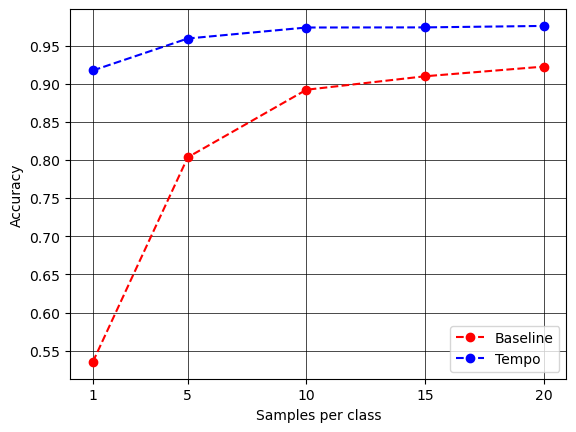

In [25]:
X = [1,5,10,15,20]
plt.xticks(X)
plt.yticks(np.arange(0.4, 1.0, 0.05))
plt.plot(X, dfs_bl, '--ro', label='Baseline')
plt.plot(X, dfs_tp, '--bo', label='Tempo')

plt.xlabel('Samples per class')
plt.ylabel('Accuracy')
plt.grid(color='black', linestyle='-', linewidth=0.5)

plt.legend()

In [27]:
dfs_bl, dfs_tp, np.array(dfs_tp) - np.array(dfs_bl)

([0.5352500081062317,
  0.8034999966621399,
  0.8920833468437195,
  0.9097499847412108,
  0.9224166870117188],
 [0.9173333048820496,
  0.9592499732971193,
  0.9736666679382324,
  0.9738333225250244,
  0.9757500290870668],
 array([0.3820833 , 0.15574998, 0.08158332, 0.06408334, 0.05333334]))